## Logarithmic transformation as variance stabilizer

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Generate data with increasing variance
n_groups = 10
n_per_group = 100
means = np.exp(np.linspace(1, 5, n_groups))
data = []
groups = []

for i, mean in enumerate(means):
    # Generate data with multiplicative noise
    noise = np.random.normal(1, 0.3, n_per_group)
    values = mean * noise
    data.extend(values)
    groups.extend([i] * n_per_group)

data = np.array(data)
groups = np.array(groups)

# Calculate variance for each group
original_variances = [np.var(data[groups == i]) for i in range(n_groups)]
log_variances = [np.var(np.log(data[groups == i])) for i in range(n_groups)]

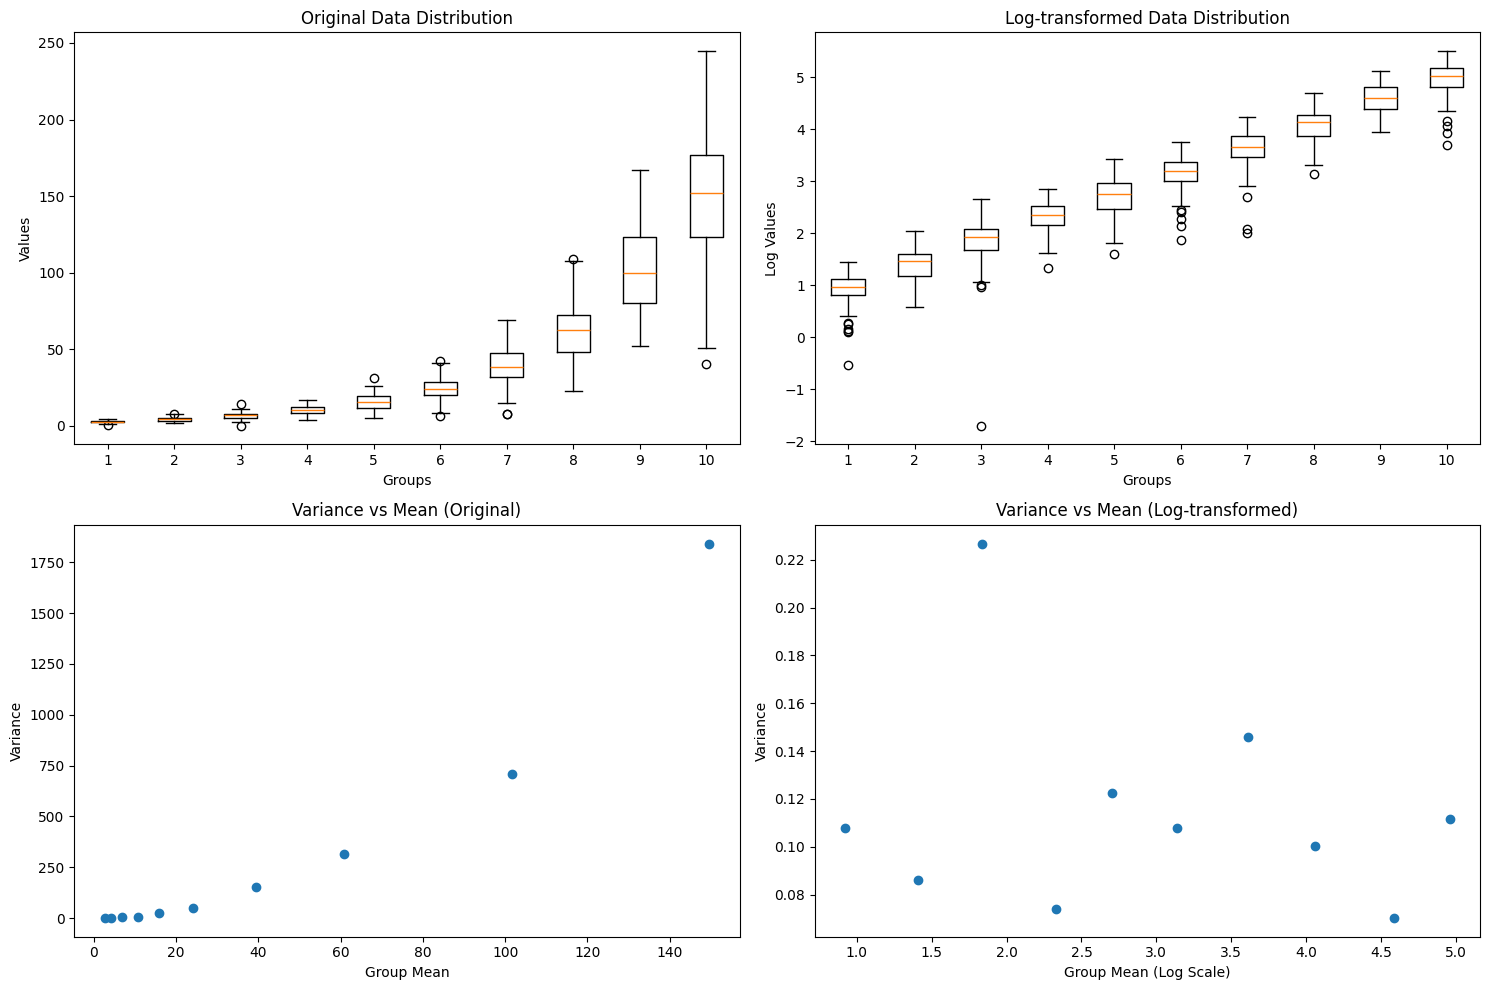

In [3]:
# Create subplots
plt.figure(figsize=(15, 10))

# Plot 1: Original Data Boxplot
plt.subplot(221)
plt.boxplot([data[groups == i] for i in range(n_groups)])
plt.title('Original Data Distribution')
plt.ylabel('Values')
plt.xlabel('Groups')

# Plot 2: Log-transformed Data Boxplot
plt.subplot(222)
plt.boxplot([np.log(data[groups == i]) for i in range(n_groups)])
plt.title('Log-transformed Data Distribution')
plt.ylabel('Log Values')
plt.xlabel('Groups')

# Plot 3: Variance vs Mean (Original)
plt.subplot(223)
group_means = [np.mean(data[groups == i]) for i in range(n_groups)]
plt.scatter(group_means, original_variances)
plt.title('Variance vs Mean (Original)')
plt.xlabel('Group Mean')
plt.ylabel('Variance')

# Plot 4: Variance vs Mean (Log-transformed)
plt.subplot(224)
log_means = [np.mean(np.log(data[groups == i])) for i in range(n_groups)]
plt.scatter(log_means, log_variances)
plt.title('Variance vs Mean (Log-transformed)')
plt.xlabel('Group Mean (Log Scale)')
plt.ylabel('Variance')

plt.tight_layout()
plt.show()

In [4]:
# Print variance statistics
print("\nVariance Statistics:")
print(f"Original data variance range: {min(original_variances):.2f} to {max(original_variances):.2f}")
print(f"Log-transformed variance range: {min(log_variances):.2f} to {max(log_variances):.2f}")


Variance Statistics:
Original data variance range: 0.54 to 1841.64
Log-transformed variance range: 0.07 to 0.23
